In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Newton's method for Unconstrained optimization problem

In [2]:
def newtonMethodMultiDim(objective,
                         gradient,
                         hessian,
                         x0,
                         tolerance,
                         minima=True,
                         max_iterations=10000):
  norm_gradients = []
  function_values = []
  delta_xs = []
  condition_numbers = []
  x = x0
  i = 0
  while(np.linalg.norm(gradient(x)) > tolerance and i < max_iterations):
    h = hessian(x)
    g = gradient(x)
    cond_h = np.linalg.cond(h)
    del_x = np.linalg.solve(h,g)
    x -= del_x
    norm_gradients.append(np.linalg.norm(g))
    function_values.append(objective(x))
    delta_xs.append(np.linalg.norm(del_x))
    condition_numbers.append(cond_h)
    i += 1

  return x, objective(x), norm_gradients, function_values, delta_xs, condition_numbers

#Defining the Problem/Function

In [3]:
#Objective function
def objective(x):
  f = 2*(x[0]**2) + 1.05*(x[0]**4) + (1/6)*(x[0]**6) + x[0]*x[1] + x[1]**2
  h = x[0]**2 + x[1]**2 - 1
  l = x[2]
  return f + l*h

#gradient of the objective function
def grad_objective(x):
  x1 = 4*x[0] + 4.2*(x[0]**3) + x[0]**5 + x[1] + 2*x[0]*x[2]
  x2 = x[0] + 2*x[1] + 2*x[1]*x[2]
  x3 = x[0]**2 + x[1]**2 - 1
  return np.array([x1,x2,x3])

#hessian of the objective function
def hessian_objective(x):
  r1 = [4 + 12.6*(x[0]**2) + 5*(x[0]**4) + 2*x[2], 1, 2*x[0]]
  r2 = [1, 2 + 2*x[2], 2*x[1]]
  r3 = [2*x[0], 2*x[1], 0]
  return np.array([r1,r2,r3])

#Solving the Problem

Optima/ Point of minima:  [0.33303125409609396, -0.9429158454733289]
Optimum Value of the function:  0.8100328976003665


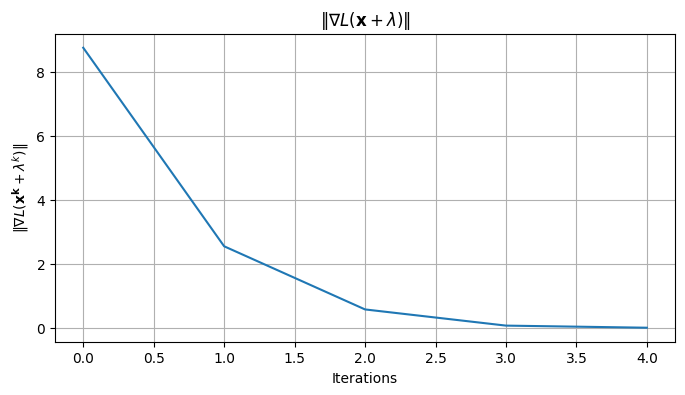

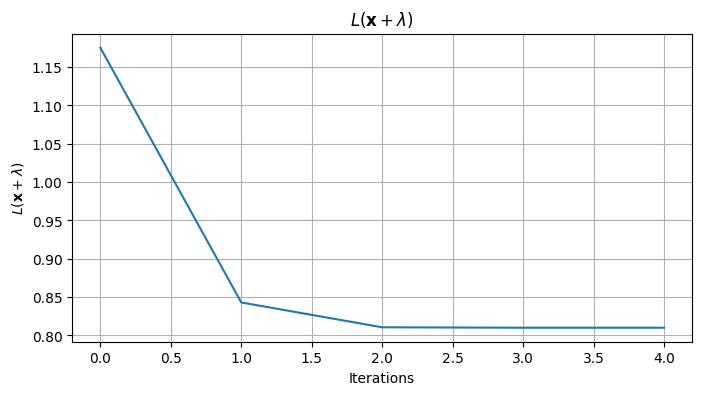

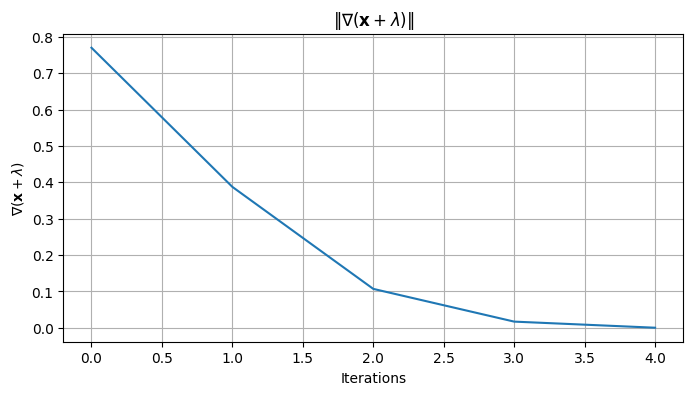

In [4]:
#initial point
x0 = np.array([1.0,-1.0,0.2])

#tolerance
tolerance = 1e-3

#solving the problem
optima, optimum, norm_gradients, function_values,delta_xs,condition_numbers = newtonMethodMultiDim(objective, grad_objective, hessian_objective, x0,tolerance)

x_ = [optima[0],optima[1], 0]
print("Optima/ Point of minima: ", [optima[0],optima[1]])
print("Optimum Value of the function: ", objective(x_))
#Plots
iterations = np.arange(0, len(norm_gradients))

#Plot of norm of gradients vs iterations
plt.figure(figsize = (8,4))
plt.title(r"$\| \nabla L(\mathbf{x} + \lambda) \|$")
plt.plot(iterations, norm_gradients)
plt.xlabel("Iterations")
plt.ylabel(r"$\| \nabla L(\mathbf{x^k} + \lambda^k) \|$")
plt.grid(True)
plt.show()

print("\n")
#Plot of function values vs iterations
plt.figure(figsize = (8,4))
plt.title(r"$L(\mathbf{x} + \lambda)$")
plt.plot(iterations, function_values)
plt.xlabel("Iterations")
plt.ylabel(r"$L(\mathbf{x} + \lambda)$")
plt.grid(True)
plt.show()

print("\n")
#Plot of delta_x vs iterations
plt.figure(figsize = (8,4))
plt.title(r"$\| \nabla (\mathbf{x} + \lambda)\|$")
plt.plot(iterations, delta_xs)
plt.xlabel("Iterations")
plt.ylabel(r"$\nabla(\mathbf{x} + \lambda)$")
plt.grid(True)
plt.show()